#Supervised-Learning-In Depth-Random Forests

In the last supervised learning notebook we looked at SVM, a descrimiantive classifier. Here going to look at a non-parametric algorithm **random forset**

In [8]:
from __future__ import print_function

import IPython
print('IPython:', IPython.__version__)

import numpy as np
print('numpy:', np.__version__)

import scipy as sp
print('scipy:', sp.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)

import matplotlib.pyplot as plt

import sklearn
print('scikit-learn:', sklearn.__version__)

import seaborn
print('seaborn', seaborn.__version__)

import pandas as pd
print('pandas', pd.__version__)



from scipy import stats



IPython: 3.1.0
numpy: 1.9.2
scipy: 0.15.1
matplotlib: 1.4.3
scikit-learn: 0.16.1
seaborn 0.5.1
pandas 0.16.0


In [9]:
%matplotlib inline

In [10]:
seaborn.set()

###Motivating Random Forests: Decision Trees

RF are a _ensemble learner_ built on decision trees. Decision trees are cray intuitive ways to classify or label objects. Basically ask a series of questions which hone in on the classification

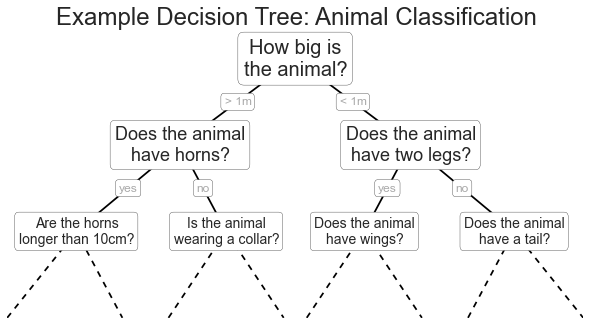

In [11]:
import fig_code 
fig_code.plot_example_decision_tree()

Binary splitting makes this extremely efficient. But gotta ask the right questions! The key is asking the 'right' questions. When we train a decision tree classifier the algorithm looks at the features of the data and decides which questions (or 'splits') contain the most information

###Creating a Decision Tree

In [12]:
#Define some 2-dimensional data

In [13]:
from sklearn.datasets import make_blobs

In [14]:
blobsX,blobsY = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

In [15]:
blobsXDF = pd.DataFrame(blobsX)
blobsYSeries = pd.Series(blobsY)

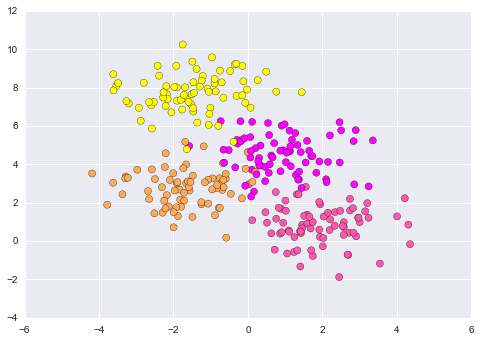

In [16]:
plt.scatter(blobsX[: , 0], blobsX[:, 1], s=50, c=blobsYSeries, cmap='spring')

Can use some convenience functions to help!

In [17]:
from fig_code import visualize_tree, plot_tree_interactive

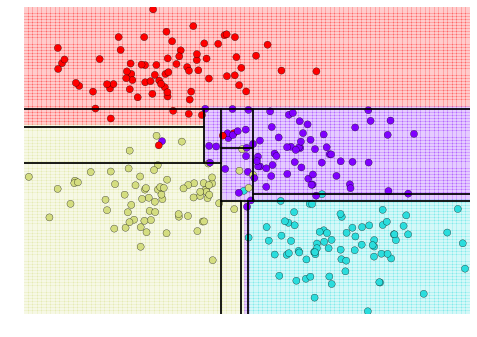

In [18]:
#Using Pythons interact we can now view decision tree splits
plot_tree_interactive(blobsX, blobsY)

As increase depth every node gets split in two EXCEPT the nodes that contain just a single class. This means that we get very fast **non-paramentric** classification. Oh awesome I get it. So the sections that only contain one color of data points don't get split in half but all others do.

However, decision trees often have a big problem which is that is crazy easy to overfit data. They are so flexible they can learn the structure of the the noise in the data instead of the signal! eek! Lets take a look at two different trees built on two different data subsets

####Decision Trees and Overfitting

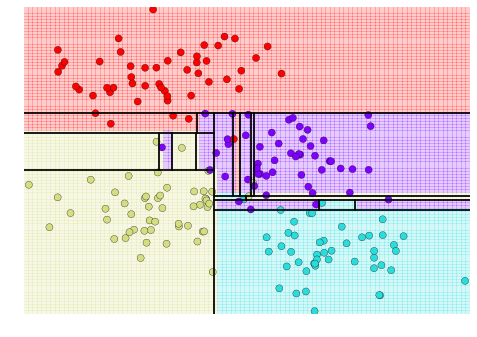

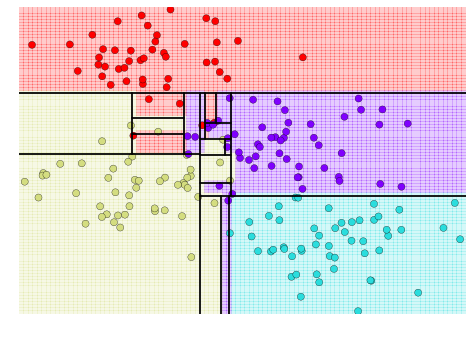

In [19]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()

plt.figure()
visualize_tree(clf, blobsX[ :200], blobsY[: 200])
plt.figure()
visualize_tree(clf, blobsX[-200:], blobsY[-200:])

Clearly we can see how different these classificationsa are. We are over-fitting big time! When we predict value for a new point now the result will be way more reflective of the noise in the data rather than the actual signal

###Ensembles of Estimators: Random Forest

A technique to get around this prepensity for overfitting is to use an **Ensemble Method**. Ensemble Methods are essentially meta estimators that average the result of many individual estimators. THis is important since the individual estimators are likely to over-fit the data as we have seen. The resulting estimate is way more robust (thank you wonders of statistics) than the individual estimates.

Apparently theres a hell of alot of theory about how to randomize these trees. To start imagine an ensemble of estimators fit on subsets of the data. Can visualize what these might look like.

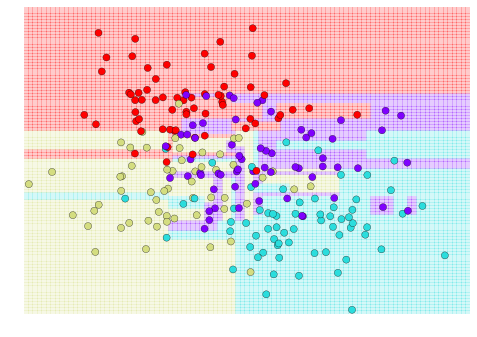

In [25]:
def fit_randomized_tree(random_state=0):
    X, y = make_blobs(n_samples=500, centers=4, random_state=0, cluster_std=2.0)
    clf = DecisionTreeClassifier(max_depth=15)
    
    rng = np.random.RandomState(random_state)
    i = np.arange(len(blobsY))
    rng.shuffle(i)
    visualize_tree(clf, X[i[:250]], y[i[:250]], boundaries=False, xlim=(X[:, 0].min(), X[:, 0].max()),ylim=(X[:, 1].min(), X[:, 1].max()))    
from IPython.html.widgets import interact
interact(fit_randomized_tree, random_state=[0,100])

The details of the model change as a function of the sample but the larger characteristics (the large colored areas) remain the same! The random forest classifier does a similar thing to this but uses a combine version of ALL the trees to get to a final answer.

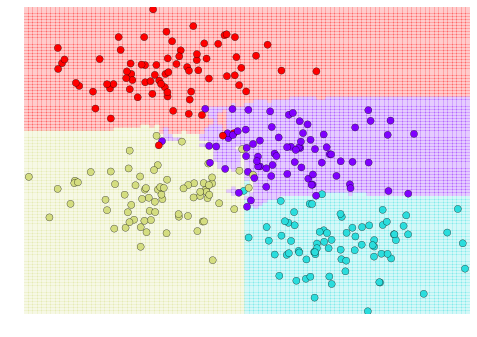

In [29]:
from sklearn.ensemble import RandomForestClassifier 
rfClassifier = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_tree(rfClassifier, blobsX, blobsY, boundaries=False)

Here we averaged 100 randomly perturbed models and we end up with an overall model which is a much better fit to our data! Here we randomized the model using sub-sampling. Random Forests actually use more sophisticated ranomization techniques 

###Random Forest for Regression

Above used random forests for classification problem. Here we are going to use or regression. Regression is essentially a case of continuous labels (y values) whereas classificaiton random forests is used for categorical variables. Get this with RandomForestRegressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
#Random x values
x = 10* np.random.rand(100)

<Container object of 3 artists>

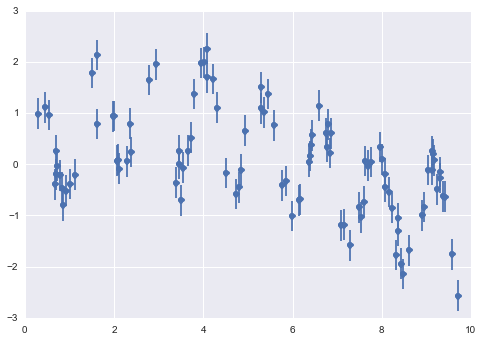

In [33]:
#making sin waves from our underly x values plus a lot of noise
def model(x, sigma=0.3): #sigma is the noise we are creating
    fast_oscillation = np.sin(5*x)
    slow_oscillation = np.sin(0.5*x)
    noise = sigma * np.random.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o') #awesome

In [41]:
xfit = np.linspace(0, 10, 1000) #linear range of 1000 points between 0 and 10
yfit = RandomForestRegressor(100).fit(x[:, None], y).predict(xfit[:, None])
ytrue = model(xfit, 0)

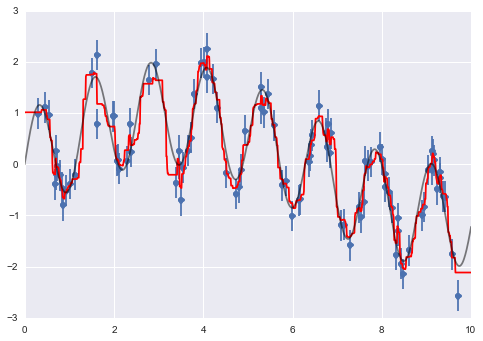

In [43]:
plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r') #red line (RF prediction)
plt.plot(xfit, ytrue, '-k', alpha=0.5) #black/grey line

Here see that our non-parametric random forest model flexible enough to fit the multi-period data without us even needing to specify a multi peridod model

###Random Forest  vs SVM for Classifying Digits

Going to use the digits data to test the SVM vs Random Forest Classifiers

In [44]:
from sklearn.datasets import load_digits 

In [45]:
digits = load_digits()

In [46]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [48]:
digitsXDF = pd.DataFrame(digits.data)
digitsYSeries = pd.Series(digits.target)

In [52]:
digitsNames = digits.target_names

In [54]:
print('shape of digits X', digitsXDF.shape)
print('shape of digits Y', digitsYSeries.shape)

shape of digits X (1797, 64)
shape of digits Y (1797,)


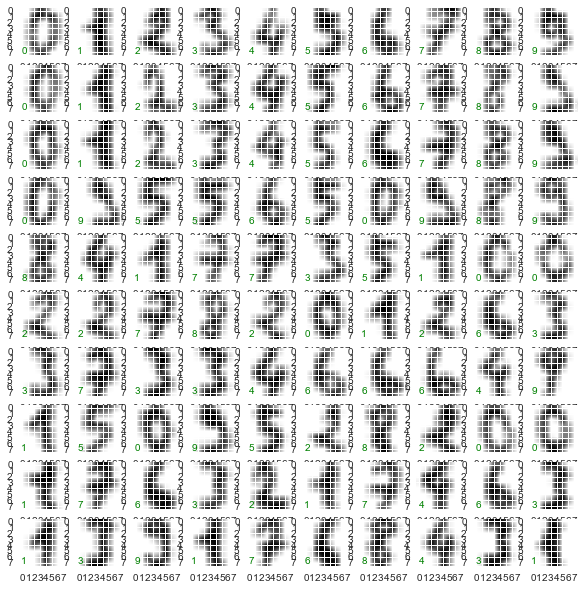

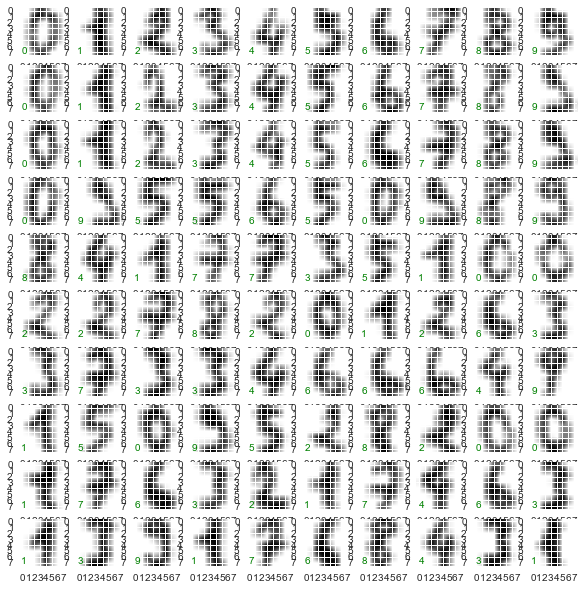

In [61]:
digitsFig.subplots_adjust(hspace=0.1, wspace=0.1)
#Plot some of the samples
digitsFig, digitsAxes = plt.subplots(10,10, figsize=(10,10))
for i, ax in enumerate(digitsAxes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

digitsFig

In [63]:
#Classify the digits using a decision tree
from sklearn.cross_validation import train_test_split
from sklearn import metrics 

xTrain, xTest, yTrain, yTest = train_test_split(digitsXDF, digitsYSeries, random_state=0)

In [67]:
clf = DecisionTreeClassifier(max_depth=11)
clf.fit(xTrain, yTrain)
yPred = clf.predict(xTest)

Check accuracy of our classifier

In [71]:
print('accuracy score for random forest', metrics.accuracy_score(yPred, yTest))

accuracy score 0.833333333333


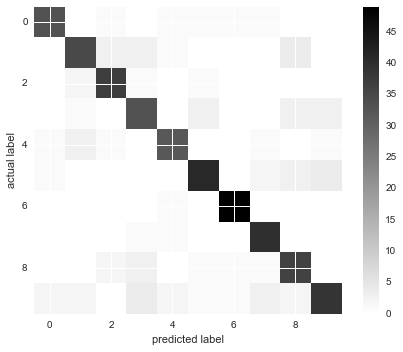

In [74]:
plt.imshow(metrics.confusion_matrix(yPred, yTest), interpolation='nearest', cmap=plt.cm.binary)
plt.colorbar()
plt.xlabel('predicted label')
plt.ylabel('actual label')

In [76]:
from sklearn.svm import SVC

In [108]:
#how far the influence of a single training example reaches, 
#with low values meaning ‘far’ and high values meaning ‘close’
digitsSVC = SVC(probability=True, kernel='poly', gamma=2.0) 


In [109]:
digitsSVC.fit(xTrain, yTrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=2.0,
  kernel='poly', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [111]:
yPred = digitsSVC.predict(xTest)

In [112]:
print('accuracy score for SVC', metrics.accuracy_score(yPred, yTest))

accuracy score for SVC 0.982222222222


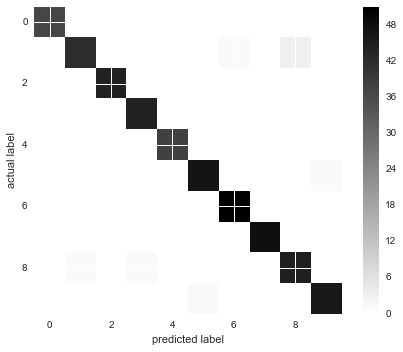

In [113]:
plt.imshow(metrics.confusion_matrix(yPred, yTest), interpolation='nearest', cmap=plt.cm.binary)
plt.colorbar()
plt.xlabel('predicted label')
plt.ylabel('actual label')

In [114]:
sklearn.metrics.f1_score(yTest, yPred, average='binary')


/Users/Jslice/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


0.98232773672663887

In [115]:
sklearn.metrics.accuracy_score(yTest, yPred) #pretty slick

0.98222222222222222